# Sales Prediction

The aim is to build a model which predicts sales based on the money spent on different platforms such as TV, radio, and newspaper for marketing.

In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the dataset
dataset = pd.read_csv("advertising.csv")

In [4]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Data Pre-Processing

In [5]:
dataset.shape

(200, 4)

**1. Checking for missing values**

In [6]:
dataset.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**Conclusion:** The dataset does not have missing values

**2. Checking for duplicate rows**

In [7]:
dataset.duplicated().any()

False

**Conclusion:** There are no duplicate rows present in the dataset

**3. Checking for outliers**

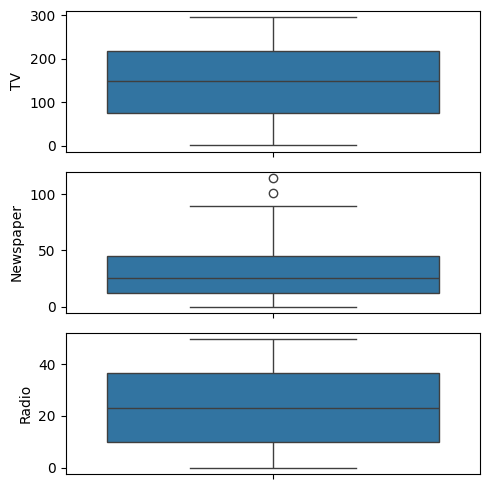

In [8]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(dataset['TV'], ax = axs[0])
plt2 = sns.boxplot(dataset['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(dataset['Radio'], ax = axs[2])
plt.tight_layout()

**Conclusion:** There are not that extreme values present in the dataset

# Exploratory Data Analysis

**1. Distribution of the target variable**

<ipython-input-9-e26ae89dfd77>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sales']);


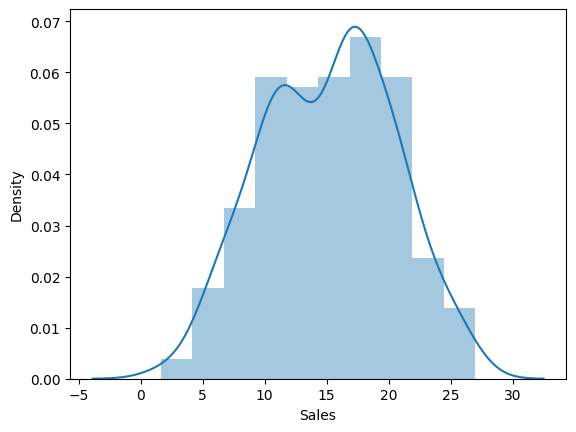

In [9]:
sns.distplot(dataset['Sales']);

**Conclusion:** It is normally distributed

**2. How Sales are related with other variables**

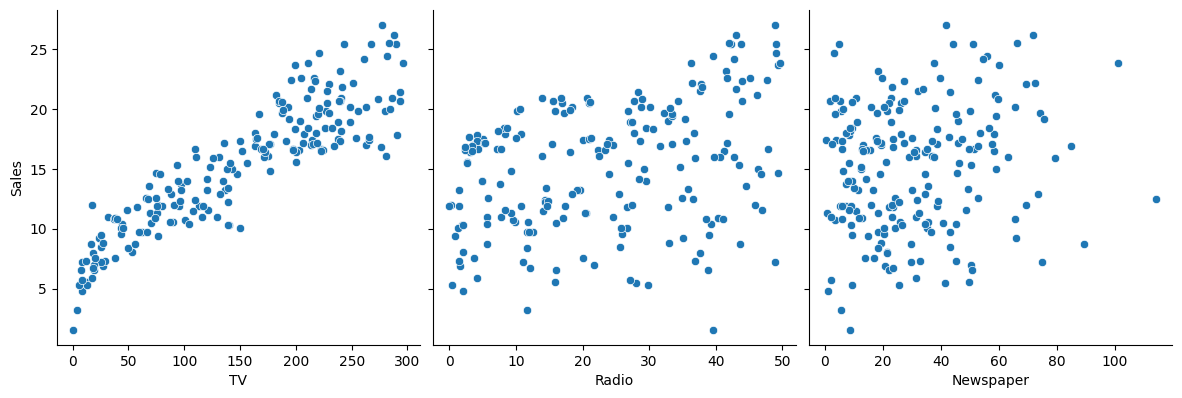

In [10]:
sns.pairplot(dataset, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

**Conclusion:** TV is strongly, positively, linearly correlated with the target variable. Bu the Newspaper feature seems to be uncorrelated

**3. Heatmap**

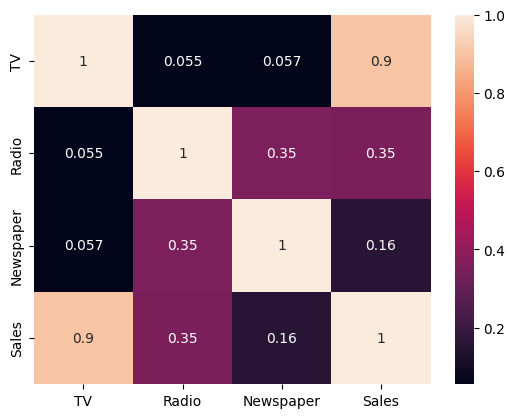

In [11]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

**Conclusion:** TV seems to be most correlated with Sales as 0.9 is very close to 1

# Model Building

Linear Regression is a useful tool for predicting a quantitative response.

Prediction using:
    1. Simple Linear Regression
    2. Multiple Linear Regression

**1. Simple Linear Regression**

Simple linear regression has only one x and one y variable. It is an approach for predicting a quantitative response using a single feature.

It establishes the relationship between two variables using a straight line. Linear regression attempts to draw a line that comes closest to the data by finding the slope and intercept that define the line and minimize regression errors.

**Formula:** Y = β0 + β1X + e

    Y = Dependent variable / Target variable
    β0 = Intercept of the regression line
    β1 = Slope of the regression lime which tells whether the line is increasing or decreasing
    X = Independent variable / Predictor variable
    e = Error
    
**Equation:** Sales = β0 + β1X + TV

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [13]:
#Setting the value for X and Y
x = dataset[['TV']]
y = dataset['Sales']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [15]:
slr= LinearRegression()
slr.fit(x_train.values, y_train)

LinearRegression()

In [16]:
#Printing the model coefficients
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  6.948683200001357
Coefficient: [0.05454575]


In [17]:
print('Regression Equation: Sales = 6.948 + 0.054 * TV')

Regression Equation: Sales = 6.948 + 0.054 * TV


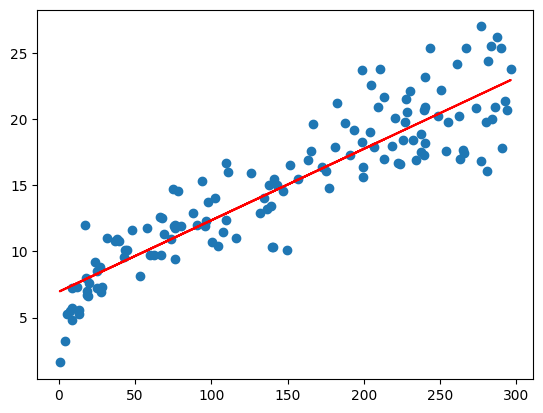

In [18]:
#Line of best fit
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

In [19]:
#Prediction of Test and Training set result
y_pred_slr= slr.predict(x_test.values)
x_pred_slr= slr.predict(x_train.values)

In [20]:
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [ 7.37414007 19.94148154 14.32326899 18.82329361 20.13239168 18.2287449
 14.54145201 17.72692398 18.75238413 18.77420243 13.34144544 19.46693349
 10.01415451 17.1923756  11.70507285 12.08689312 15.11418241 16.23237035
 15.8669138  13.1068987  18.65965635 14.00690363 17.60692332 16.60328147
 17.03419291 18.96511257 18.93783969 11.05597839 17.03419291 13.66326538
 10.6796127  10.71234015 13.5487193  17.22510305  9.67597085 13.52144643
 12.25053038 16.13418799 19.07965865 17.48692266 18.69783838 16.53237199
 15.92145955 18.86693021 13.5050827  11.84143724  7.87050642 20.51966653
 10.79961336  9.03233096 17.99419817 16.29237067 11.04506924 14.09963141
 18.44147334  9.3759692   7.88687015  8.34505447 17.72692398 11.62325422]


In [21]:
#Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

,Actual value,Predicted value
126,6.6,7.374140
104,20.7,19.941482
99,17.2,14.323269
92,19.4,18.823294
111,21.8,20.132392
167,17.2,18.228745
116,12.2,14.541452
96,16.7,17.726924
52,22.6,18.752384
69,22.3,18.774202


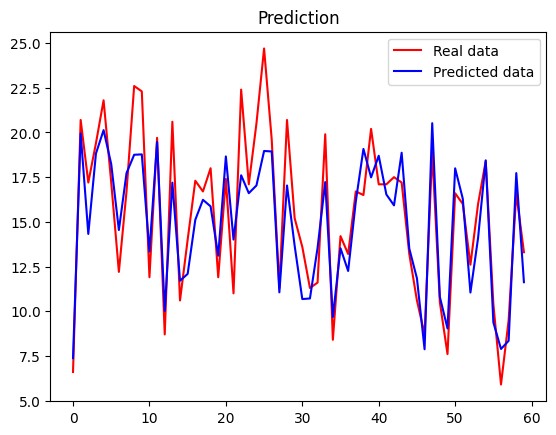

In [22]:
plt.plot(y_test.values, color = 'red', label = 'Real data')
plt.plot(y_pred_slr, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [23]:
#Predict for any value
slr.predict([[56]])

array([10.00324536])

**Conclusion:** The model predicted the Sales of 10.003 in that market

In [24]:
# print the R-squared value for the model
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f}'.format(slr.score(x,y)*100))

R squared value of the model: 81.10


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


**Conclusion:** 81.10% of the data fit the regression model

In [25]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.6480589869746525
Mean Square Error: 4.077556371826948
Root Mean Square Error: 2.019296008966231


**2. Multiple Linear Regression**

Multiple linear regression has one y and two or more x variables. It is an extension of Simple Linear regression as it takes more than one predictor variable to predict the response variable.

Multiple Linear Regression is one of the important regression algorithms which models the linear relationship between a single dependent continuous variable and more than one independent variable.

Assumptions for Multiple Linear Regression:
    1. A linear relationship should exist between the Target and predictor variables.
    2. The regression residuals must be normally distributed.
    3. MLR assumes little or no multicollinearity (correlation between the independent variable) in data.
    
**Formula:** Y = β0 + β1X1 + β2X2 + β3X3 + ... + βnXn + e

    Y = Dependent variable / Target variable
    β0 = Intercept of the regression line
    β1, β2,..βn = Slope of the regression lime which tells whether the line is increasing or decreasing
    X1, X2,..Xn = Independent variables / Predictor variables
    e = Error
    
**Equation:** Sales = β0 + (β1 * TV) + (β2 * Radio) + (β3 * Newspaper)

In [26]:
#Setting the value for X and Y
x = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

In [27]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=100)

In [28]:
mlr= LinearRegression()
mlr.fit(x_train.values, y_train)

LinearRegression()

In [29]:
#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(x, mlr.coef_))

4.334595861728431


[('TV', 0.053829108667250075),
 ('Radio', 0.11001224388558054),
 ('Newspaper', 0.0062899501461303325)]

In [30]:
#Predicting the Test and Train set result
y_pred_mlr= mlr.predict(x_test.values)
x_pred_mlr= mlr.predict(x_train.values)

In [31]:
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 9.35221067 20.96344625 16.48851064 20.10971005 21.67148354 16.16054424
 13.5618056  15.39338129 20.81980757 21.00537077 12.29451311 20.70848608
  8.17367308 16.82471534 10.48954832  9.99530649 16.34698901 14.5758119
 17.23065133 12.56890735 18.55715915 12.12402775 20.43312609 17.78017811
 16.73623408 21.60387629 20.13532087 10.82559967 19.12782848 14.84537816
 13.13597397  9.07757918 12.07834143 16.62824427  8.41792841 14.0456697
  9.92050209 14.26101605 16.76262961 17.17185467 18.88797595 15.50165469
 15.78688377 16.86266686 13.03405813 10.47673934 10.6141644  20.85264977
 10.1517568   6.88471443 17.88702583 18.16013938 12.55907083 16.28189561
 18.98024679 11.33714913  5.91026916 10.06159509 17.62383031 13.19628335]


In [32]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

,Actual value,Predicted value
126,6.6,9.352211
104,20.7,20.963446
99,17.2,16.488511
92,19.4,20.109710
111,21.8,21.671484
167,17.2,16.160544
116,12.2,13.561806
96,16.7,15.393381
52,22.6,20.819808
69,22.3,21.005371


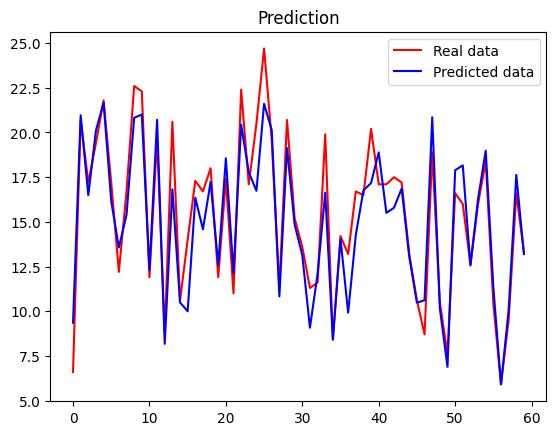

In [33]:
plt.plot(y_test.values, color = 'red', label = 'Real data')
plt.plot(y_pred_mlr, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [34]:
#Predict for any value
mlr.predict([[56, 55, 67]])

array([13.82112602])

**Conclusion:** The model predicted the Sales of 13.82 in that market

In [35]:
# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))

R squared value of the model: 90.11


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


**Conclusion:** 90.21% of the data fit the multiple regression model

In [36]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.227818356658941
Mean Square Error: 2.6360765623280655
Root Mean Square Error: 1.623599877533891
